In [2]:

import pandas as pd



In [3]:
from sqlalchemy import create_engine
import urllib
import pandas as pd

# Database connection setup
params = urllib.parse.quote_plus(
    "Driver={SQL Server};"
    "Server=DESKTOP-E3O8GQJ;"
    "Database=Olist_Ecommerce;"
    "Trusted_Connection=yes;"
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# List of view names to import
views = [
    'vw_geolocation',
    'vw_customers',
    'vw_orders',
    'vw_order_items',
    'vw_order_payments',
    'vw_order_reviews',
    'vw_products',
    'vw_sellers',
    'vw_category_translation'
]

# Dictionary to store all dataframes
dataframes = {}

# Import each view
print("Importing views from database...")
for view in views:
    try:
        query = f"SELECT * FROM {view}"
        dataframes[view] = pd.read_sql(query, engine)
        print(f"✓ {view}: {len(dataframes[view])} rows loaded")
    except Exception as e:
        print(f"✗ Error loading {view}: {str(e)}")

# Access individual dataframes like this:
# dataframes['vw_geolocation']
# dataframes['vw_customers']
# etc.

print("\nAll views imported successfully!")
print(f"Available dataframes: {list(dataframes.keys())}")



Importing views from database...
✓ vw_geolocation: 1000163 rows loaded
✓ vw_customers: 99441 rows loaded
✓ vw_orders: 99441 rows loaded
✓ vw_order_items: 112650 rows loaded
✓ vw_order_payments: 103886 rows loaded
✓ vw_order_reviews: 99224 rows loaded
✓ vw_products: 32951 rows loaded
✓ vw_sellers: 3095 rows loaded
✓ vw_category_translation: 72 rows loaded

All views imported successfully!
Available dataframes: ['vw_geolocation', 'vw_customers', 'vw_orders', 'vw_order_items', 'vw_order_payments', 'vw_order_reviews', 'vw_products', 'vw_sellers', 'vw_category_translation']


In [4]:
customers = dataframes['vw_customers']
geo = dataframes['vw_geolocation']
orders = dataframes['vw_orders']
order_items = dataframes['vw_order_items']
payments = dataframes['vw_order_payments']
reviews = dataframes['vw_order_reviews']
products = dataframes['vw_products']
sellers = dataframes['vw_sellers']
categories = dataframes['vw_category_translation']

In [5]:
def inspect(df, name):
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("\nHead:")
    print(df.head())
    print("\nInfo:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

inspect(orders, "Orders")
inspect(order_items, "Order Items")
inspect(payments, "Payments")
inspect(customers, "Customers")
inspect(products, "Products")
inspect(sellers, "Sellers")
inspect(geo, "geo")
inspect(categories, "categories")
inspect(sellers, "sellers")


===== Orders =====
Shape: (99441, 8)

Head:
                           order_id                       customer_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   
1  00018f77f2f0320c557190d7a144bdd3  f6dd3ec061db4e3987629fe6b26e5cce   
2  000229ec398224ef6ca0657da4fc703e  6489ae5e4333f3693df5ad4372dab6d3   
3  00024acbcdf0a6daa1e931b038114c75  d4eb9395c8c0431ee92fce09860c5a06   
4  00042b26cf59d7ce69dfabb4e55b4fd9  58dbd0b2d70206bf40e62cd34e84d795   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-09-13        2017-09-13   
1    delivered               2017-04-26        2017-04-26   
2    delivered               2018-01-14        2018-01-14   
3    delivered               2018-08-08        2018-08-08   
4    delivered               2017-02-04        2017-02-04   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-09-19                    2017-09-20   
1                   2

In [7]:


order_items['total_price'] = order_items['price'] + order_items['freight_value']

In [8]:
orders.describe(include='all')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,634,611,547,645,459
top,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-11-24,2018-04-24,2017-11-28,2018-08-27,2017-12-20
freq,1,1,96478,1176,990,707,446,522


In [9]:
def inspect(df, name):
    print("="*50)
    print(f"Table: {name}")
    print("="*50)
    
    print("Shape:")
    print(df.shape)
    
    print("\nHead:")
    print(df.head())
    
    print("\nInfo:")
    print(df.info())
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    print("\nStatistics (Numerical):")
    print(df.describe())
    
    print("\nStatistics (All Columns):")
    print(df.describe(include='all'))


In [10]:
inspect(customers, "Customers")
inspect(orders, "Orders")
inspect(order_items, "Order Items")
inspect(payments, "Payments")
inspect(reviews, "Reviews")
inspect(products, "Products")
inspect(sellers, "Sellers")
inspect(geo, "Geolocation")
inspect(categories, "Categories")


Table: Customers
Shape:
(99441, 5)

Head:
                        customer_id                customer_unique_id  \
0  00012a2ce6f8dcda20d059ce98491703  248ffe10d632bebe4f7267f1f44844c9   
1  000161a058600d5901f007fab4c27140  b0015e09bb4b6e47c52844fab5fb6638   
2  0001fd6190edaaf884bcaf3d49edf079  94b11d37cd61cb2994a194d11f89682b   
3  0002414f95344307404f0ace7a26f1d5  4893ad4ea28b2c5b3ddf4e82e79db9e6   
4  000379cdec625522490c315e70c7a9fb  0b83f73b19c2019e182fd552c048a22c   

  customer_zip_code_prefix_clean customer_city customer_state  
0                          06273        osasco             SP  
1                          35550   itapecerica             MG  
2                          29830  nova venecia             ES  
3                          39664      mendonca             MG  
4                          04841     sao paulo             SP  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column         

In [11]:

order_items['total_price'] = order_items['price'] + order_items['freight_value']

In [12]:

product_revenue = order_items.groupby('product_id')['total_price'].sum().reset_index()

In [13]:

product_full = product_revenue.merge(products, on='product_id', how='left')
product_full = product_full.merge(categories, on='product_category_name', how='left')

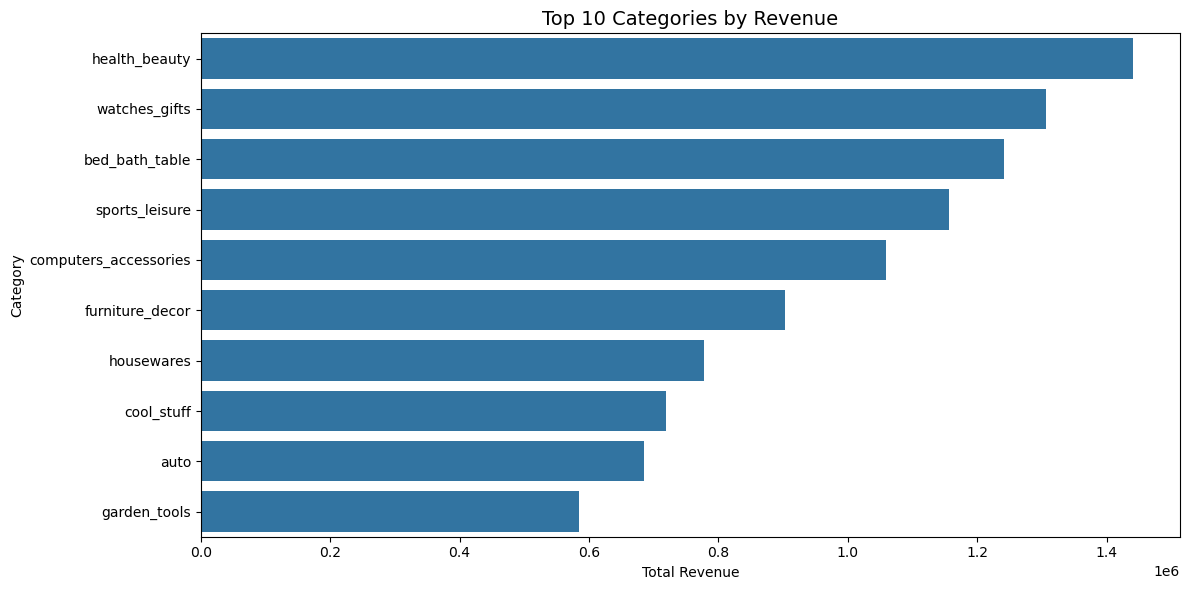

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate top 10 categories by revenue
category_revenue = (
    product_full
    .groupby('product_category_name_english')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(
    data=category_revenue,
    x='total_price',
    y='product_category_name_english'
)

# Add title and labels
plt.title("Top 10 Categories by Revenue", fontsize=14)
plt.xlabel("Total Revenue")
plt.ylabel("Category")

plt.tight_layout()
plt.show()


In [17]:
order_summary = (
    order_items
    .groupby('order_id')
    .agg(final_order_value=('total_price', 'sum'))
    .reset_index()
)


In [18]:
AOV = order_summary['final_order_value'].mean()
print("Average Order Value:", round(AOV, 2))


Average Order Value: 160.58


In [24]:
order_items.columns



Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_price'],
      dtype='object')

In [25]:
orders.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [26]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


In [27]:
orders['order_year'] = orders['order_purchase_timestamp'].dt.year



In [28]:
merged = order_items.merge(
    orders[['order_id', 'order_year']],
    on='order_id',
    how='left'
)


In [29]:
merged['total_price'] = merged['price'] + merged['freight_value']


In [30]:
revenue_by_year = merged.groupby('order_year')['total_price'].sum()


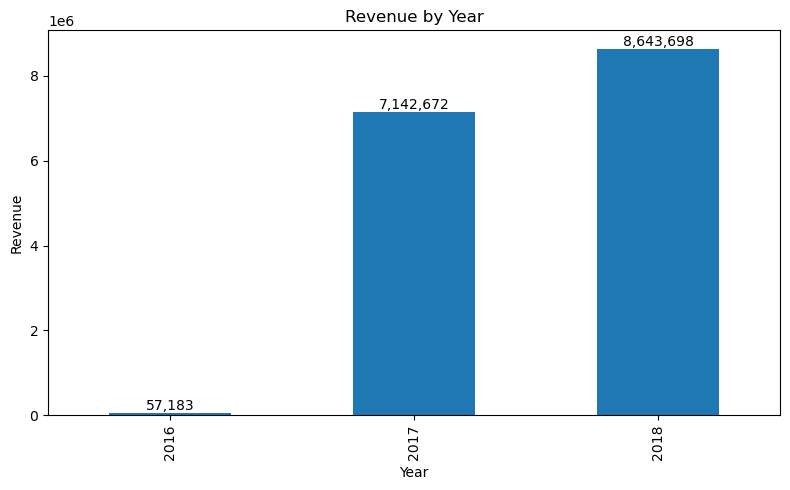

In [31]:
plt.figure(figsize=(8,5))
ax = revenue_by_year.plot(kind='bar')

plt.title("Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")

for i, v in enumerate(revenue_by_year):
    ax.text(i, v, f"{v:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [34]:
order_summary = order_items.groupby('order_id').agg(
    total_price=('price','sum'),
    freight_cost=('freight_value','sum')
)

order_summary['final_order_value'] = order_summary['total_price'] + order_summary['freight_cost']

order_summary.head()


,total_price,freight_cost,final_order_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [35]:
# Convert columns to datetime first
orders['order_delivered_customer_date'] = pd.to_datetime(
    orders['order_delivered_customer_date'],
    errors='coerce'
)

orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    errors='coerce'
)

# Now calculate delivery days
orders['delivery_days'] = (
    orders['order_delivered_customer_date'] -
    orders['order_purchase_timestamp']
).dt.days


In [36]:
orders['delivery_days'] = (
    orders['order_delivered_customer_date'] -
    orders['order_purchase_timestamp']
).apply(lambda x: x.days if pd.notnull(x) else None)


In [37]:
print("Average Delivery Time:", orders['delivery_days'].mean())

Average Delivery Time: 12.497336125046644


In [39]:
orders_customers = orders.merge(customers, on='customer_id', how='left')

In [40]:
city_delivery = (
    orders_customers
    .groupby('customer_city')['delivery_days'] 
    .mean()                                 
    .sort_values(ascending=False)              
    .head(10)                                   
)

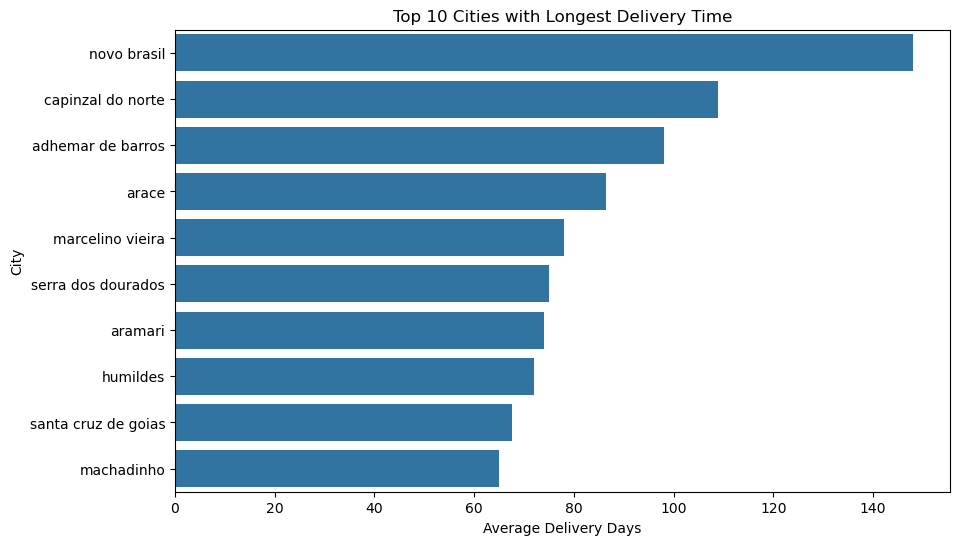

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=city_delivery.values, y=city_delivery.index)
plt.title("Top 10 Cities with Longest Delivery Time")
plt.xlabel("Average Delivery Days")
plt.ylabel("City")
plt.show()

In [42]:
repeat = customers['customer_unique_id'].value_counts()
repeat_rate = (repeat > 1).mean() * 100

print("Repeat Customer Rate:", repeat_rate, "%")

Repeat Customer Rate: 3.1187562437562435 %


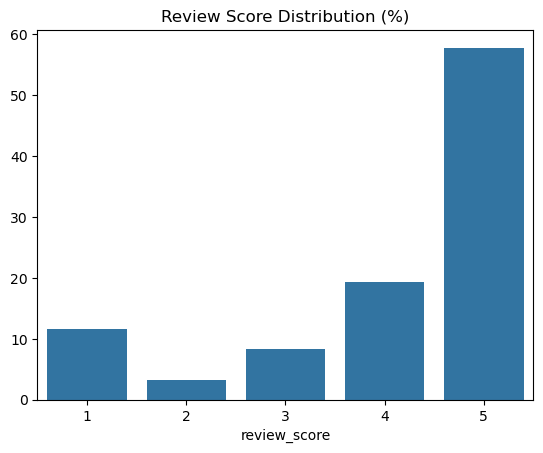

In [43]:
review_dist = reviews['review_score'].value_counts(normalize=True) * 100

sns.barplot(x=review_dist.index, y=review_dist.values)
plt.title("Review Score Distribution (%)")
plt.show()

In [44]:
payment_summary = payments.groupby('payment_type').agg(
    total_payment=('payment_value','sum'),
    avg_installments=('payment_installments','mean'),
    order_count=('order_id','count')
)

payment_summary

,total_payment,avg_installments,order_count
payment_type,,,
boleto,2869361.27,1.000000,19784
credit_card,12542084.19,3.507155,76795
debit_card,217989.79,1.000000,1529
not_defined,0.00,1.000000,3
voucher,379436.87,1.000000,5775


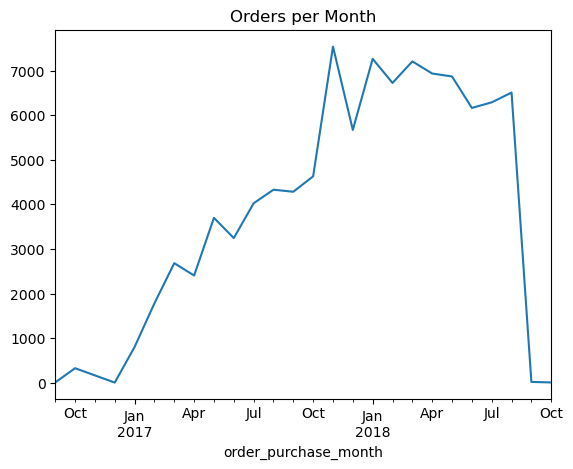

In [45]:
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

orders_monthly = orders.groupby('order_purchase_month')['order_id'].count()

orders_monthly.plot()
plt.title("Orders per Month")
plt.show()

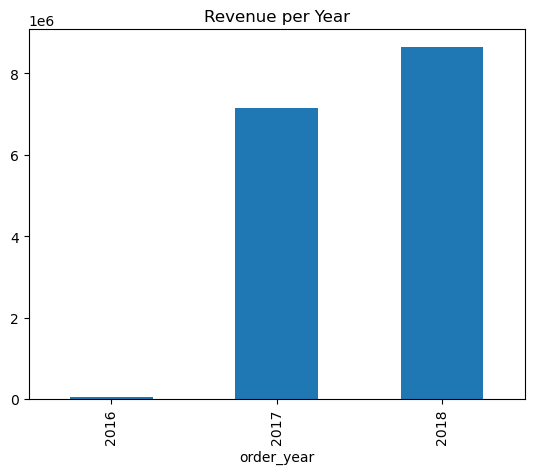

order_year
2016      57183.21
2017    7142672.43
2018    8643697.60
Name: total_price, dtype: float64


In [46]:
orders_items = orders.merge(order_items, on='order_id')
orders_items['order_year'] = orders_items['order_purchase_timestamp'].dt.year

revenue_by_year = (
    orders_items
    .groupby('order_year')['total_price']
    .sum()
)

revenue_by_year.plot(kind='bar')
plt.title("Revenue per Year")
plt.show()

print(revenue_by_year)

In [48]:
last_date = orders['order_purchase_timestamp'].max()

rfm = orders_items.groupby('customer_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (last_date - x.max()).days),
    Frequency=('order_id','count'),
    Monetary=('total_price','sum')
)

rfm.describe()

,Recency,Frequency,Monetary
count,98666.000000,98666.000000,98666.000000
mean,289.716062,1.141731,160.577638
std,153.392938,0.538452,220.466087
min,44.000000,1.000000,9.590000
25%,166.000000,1.000000,61.980000
50%,271.000000,1.000000,105.290000
75%,400.000000,1.000000,176.870000
max,773.000000,21.000000,13664.080000


In [49]:
order_items['freight_ratio'] = order_items['freight_value'] / order_items['price']

order_items['freight_ratio'].describe()

count    112650.000000
mean          0.320864
std           0.349894
min           0.000000
25%           0.134034
50%           0.231356
75%           0.393036
max          26.235294
Name: freight_ratio, dtype: float64

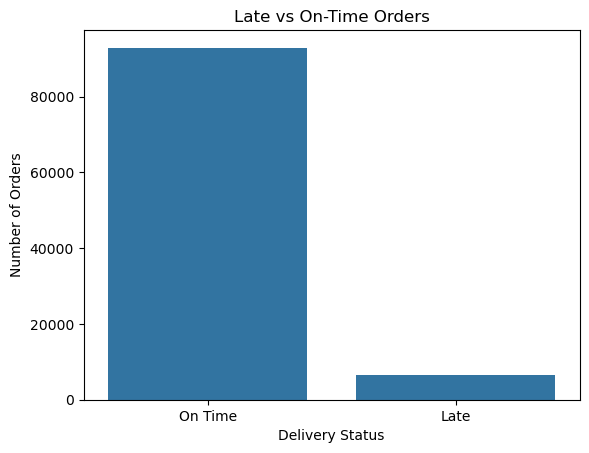

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert both columns to datetime
orders['order_delivered_customer_date'] = pd.to_datetime(
    orders['order_delivered_customer_date'],
    errors='coerce'
)

orders['order_estimated_delivery_date'] = pd.to_datetime(
    orders['order_estimated_delivery_date'],
    errors='coerce'
)

# Create delivery status (vectorized way - faster)
orders['delivery_status'] = (
    orders['order_delivered_customer_date'] >
    orders['order_estimated_delivery_date']
)

orders['delivery_status'] = orders['delivery_status'].map({
    True: 'Late',
    False: 'On Time'
})

# Count values
delivery_status_count = orders['delivery_status'].value_counts()

# Plot
sns.barplot(
    x=delivery_status_count.index,
    y=delivery_status_count.values
)

plt.title("Late vs On-Time Orders")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.show()


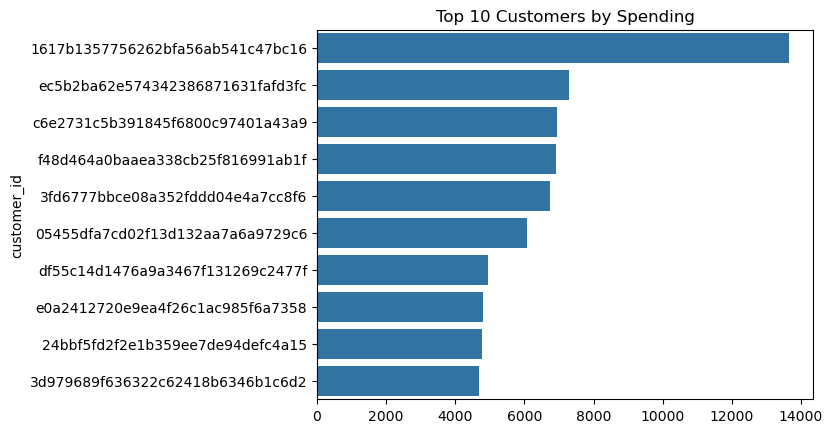

In [51]:
top_customers = (
    orders_items
    .groupby('customer_id')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Spending")
plt.show()